In [16]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [17]:
df=pd.read_csv(r"D:\python_jupty\機器學習作業\大里補值完.csv")
df.head()
df

,time,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,aqi
0,44927.00,17.9,2.21,0.45,0.13,0.8,14.0,14.9,13.9,30,14,0.0,81,1.9,2.34,285,260,0.8,0.2,28
1,44927.04,17.7,2.18,0.42,0.12,0.6,15.7,16.4,12.4,27,21,0.0,85,1.2,2.30,319,308,0.9,0.2,31
2,44927.08,17.6,2.22,0.46,0.14,0.4,15.0,15.5,11.3,29,20,0.0,86,1.1,2.36,176,159,0.2,0.1,38
3,44927.13,17.2,2.20,0.50,0.14,1.3,17.9,19.2,4.3,36,27,0.0,89,1.1,2.34,136,135,0.7,0.8,44
4,44927.17,17.0,2.22,0.46,0.13,1.1,15.8,17.0,5.7,32,28,0.0,90,0.9,2.35,256,278,1.5,0.6,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,45291.79,21.7,2.18,0.57,0.08,0.9,20.3,21.3,37.0,52,40,0.0,69,1.3,2.26,338,332,1.7,1.5,70
8757,45291.83,20.9,2.20,0.58,0.08,0.9,20.2,21.1,38.7,52,40,0.0,70,1.4,2.28,337,313,1.6,1.3,79
8758,45291.88,20.3,2.20,0.56,0.07,0.8,19.3,20.1,41.2,53,43,0.0,71,1.4,2.27,348,339,2.0,1.6,86
8759,45291.92,20.0,2.21,0.55,0.06,0.7,18.2,18.9,40.5,42,39,0.0,70,1.5,2.27,9,351,1.2,1.5,93


In [18]:
new_df=df.drop(columns=['time'])


new_df

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,aqi
0,17.9,2.21,0.45,0.13,0.8,14.0,14.9,13.9,30,14,0.0,81,1.9,2.34,285,260,0.8,0.2,28
1,17.7,2.18,0.42,0.12,0.6,15.7,16.4,12.4,27,21,0.0,85,1.2,2.30,319,308,0.9,0.2,31
2,17.6,2.22,0.46,0.14,0.4,15.0,15.5,11.3,29,20,0.0,86,1.1,2.36,176,159,0.2,0.1,38
3,17.2,2.20,0.50,0.14,1.3,17.9,19.2,4.3,36,27,0.0,89,1.1,2.34,136,135,0.7,0.8,44
4,17.0,2.22,0.46,0.13,1.1,15.8,17.0,5.7,32,28,0.0,90,0.9,2.35,256,278,1.5,0.6,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,21.7,2.18,0.57,0.08,0.9,20.3,21.3,37.0,52,40,0.0,69,1.3,2.26,338,332,1.7,1.5,70
8757,20.9,2.20,0.58,0.08,0.9,20.2,21.1,38.7,52,40,0.0,70,1.4,2.28,337,313,1.6,1.3,79
8758,20.3,2.20,0.56,0.07,0.8,19.3,20.1,41.2,53,43,0.0,71,1.4,2.27,348,339,2.0,1.6,86
8759,20.0,2.21,0.55,0.06,0.7,18.2,18.9,40.5,42,39,0.0,70,1.5,2.27,9,351,1.2,1.5,93


In [19]:
new_df.describe()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,aqi
count,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000
mean,24.749983,2.157149,0.354461,0.112074,2.214513,12.108486,14.362778,27.943665,32.161511,15.190389,0.149184,73.714302,1.456346,2.268154,224.556443,214.668074,1.623821,1.292039,50.102271
std,5.151939,0.217474,0.158710,0.101461,3.787623,6.892672,8.991392,18.834477,18.654319,10.375905,1.502620,14.115392,0.692366,0.288285,101.234739,106.008612,1.010667,0.890715,24.690195
min,8.700000,1.850000,0.080000,0.000000,0.000000,1.700000,2.100000,0.100000,0.000000,0.000000,0.000000,21.000000,0.200000,1.840000,0.000000,0.000000,0.200000,0.000000,8.000000
25%,21.100000,2.040000,0.240000,0.040000,0.700000,6.900000,8.100000,13.500000,19.000000,7.000000,0.000000,63.000000,1.100000,2.090000,141.000000,131.000000,0.900000,0.600000,30.000000
50%,25.600000,2.100000,0.330000,0.080000,1.100000,10.500000,12.100000,24.000000,28.000000,13.000000,0.000000,75.000000,1.300000,2.200000,253.000000,251.000000,1.400000,1.100000,47.000000
75%,28.600000,2.230000,0.440000,0.150000,2.000000,15.600000,17.900000,38.500000,42.000000,21.000000,0.000000,85.000000,1.600000,2.380000,295.000000,285.000000,2.200000,1.800000,65.000000
max,35.800000,8.650000,1.470000,1.350000,60.800000,51.200000,83.300000,119.900000,295.000000,74.000000,38.000000,100.000000,22.700000,10.000000,360.000000,360.000000,6.900000,5.200000,169.000000


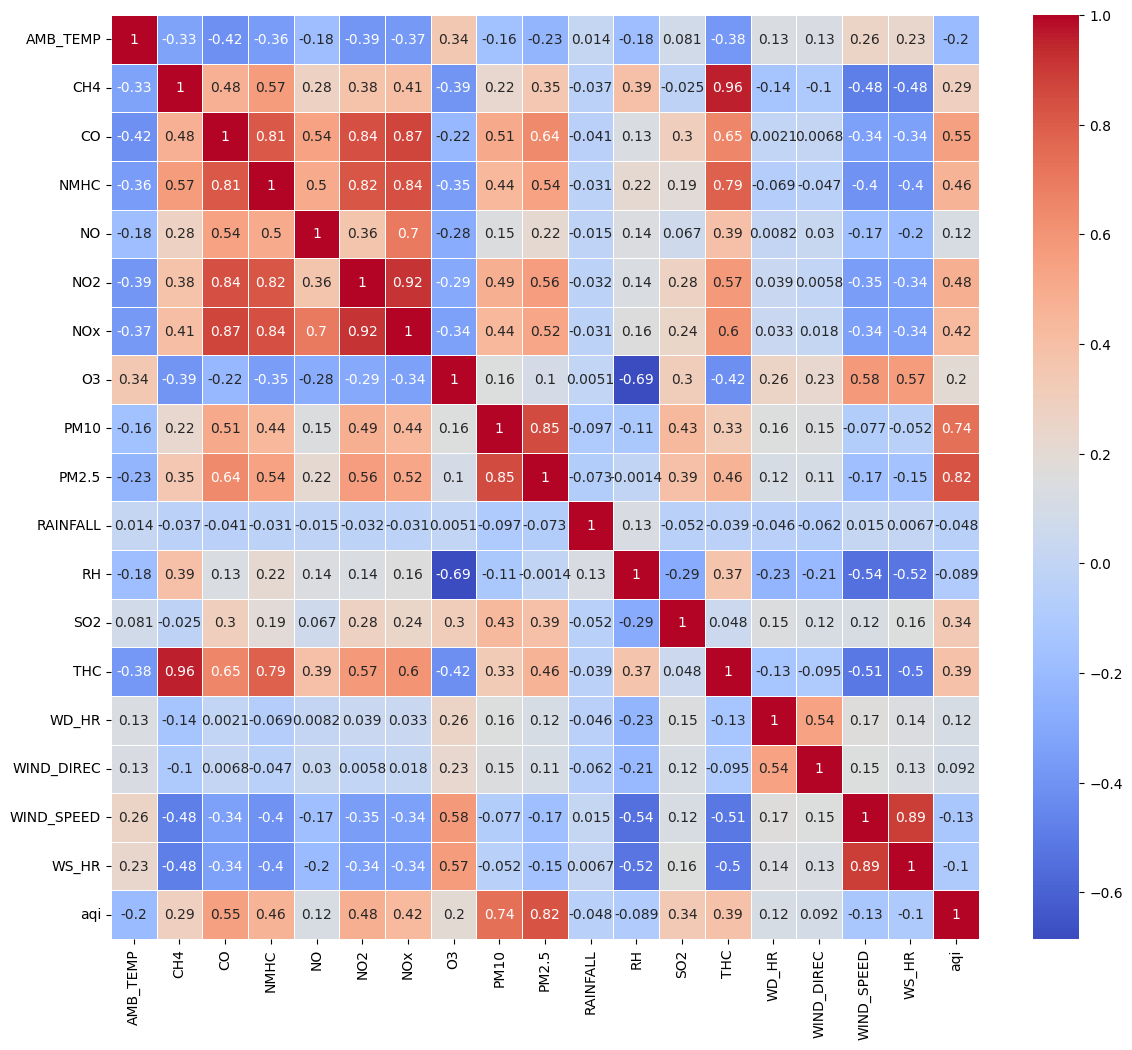

In [20]:
import seaborn as sns
plt.figure(figsize=(14, 12))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [21]:
df_trans = new_df.transpose()


In [22]:
df_cosine=pd.DataFrame(cosine_similarity(df_trans,dense_output=True))


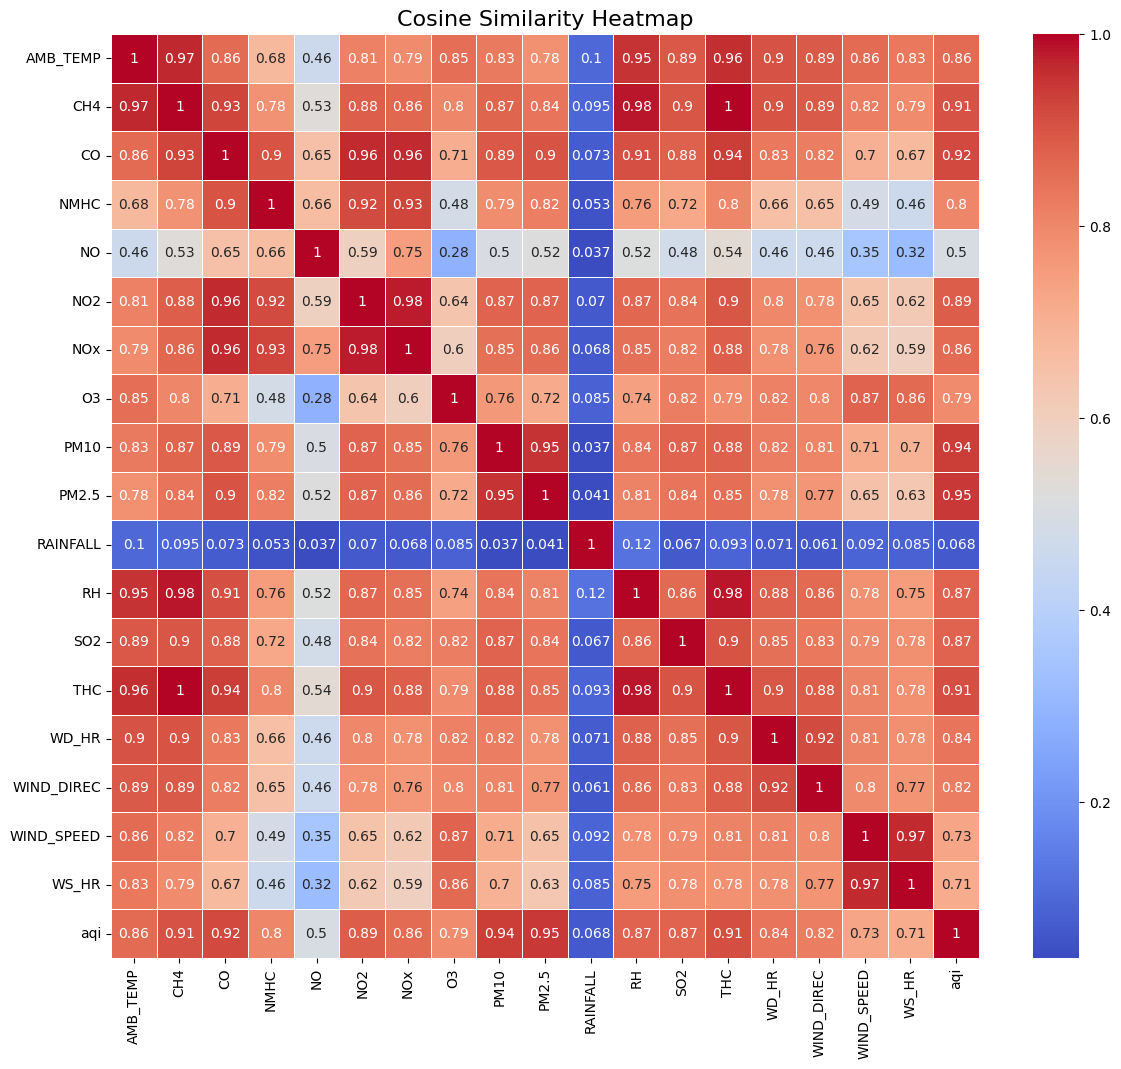

In [23]:
df_cosine.columns = df_trans.index  
df_cosine.index = df_trans.index   


plt.figure(figsize=(14, 12))
sns.heatmap(df_cosine, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Cosine Similarity Heatmap", fontsize=16)
plt.show()